In [1]:
import jax

import jax.numpy as jnp

In [3]:
x = jnp.arange(10)
x

Array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [4]:
long_vector = jnp.arange(int(1e7))

In [5]:
%timeit jnp.dot(long_vector, long_vector).block_until_ready()

3.71 ms ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## JAX transformation: grad

In [6]:
def sum_of_squares(x):
    return jnp.sum(x**2)

In [8]:
sum_of_squares(x)

Array(285, dtype=int32)

In [11]:
sum_of_squares_dx = jax.grad(sum_of_squares)

In [12]:
x = jnp.asarray([1.0, 2.0, 3.0, 4.0])

In [13]:
print(sum_of_squares(x))

30.0


In [14]:
print(sum_of_squares_dx(x))

[2. 4. 6. 8.]


In [15]:
def sum_squared_error(x, y):
    return jnp.sum((x-y)**2)

sum_squared_error_dx = jax.grad(sum_squared_error)

In [16]:
y = jnp.asarray([1.1, 2.1, 3.1, 4.1])

sum_squared_error_dx(x, y)

Array([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32)

In [19]:
jax.grad(sum_squared_error, argnums=(0, 1))(x, y)

(Array([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32),
 Array([0.20000005, 0.19999981, 0.19999981, 0.19999981], dtype=float32))

## Value and Grad

In [20]:
jax.value_and_grad(sum_squared_error)(x, y)

(Array(0.03999995, dtype=float32),
 Array([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32))

## Immutability

In [23]:
def in_place_modify(x):
  x[0] = 123
  return None

in_place_modify(x)
x

TypeError: '<class 'jaxlib.xla_extension.ArrayImpl'>' object does not support item assignment. JAX arrays are immutable. Instead of ``x[idx] = y``, use ``x = x.at[idx].set(y)`` or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html

In [24]:
def jax_in_place_modify(x):
  return x.at[0].set(123)

y = jnp.array([1, 2, 3])
jax_in_place_modify(y)

Array([123,   2,   3], dtype=int32)

## First Training Loop

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
xs = np.random.normal(size=(1000,))

<Axes: >

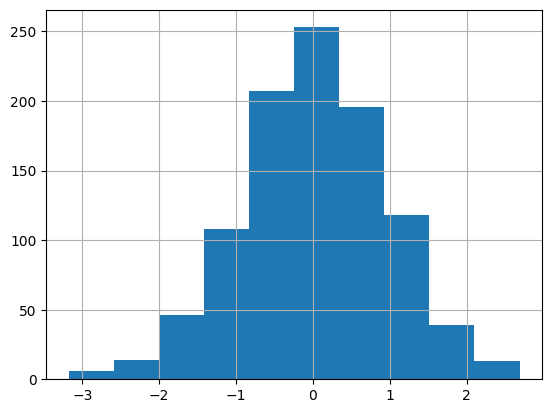

In [34]:
pd.Series(xs).hist()

In [35]:
noise = np.random.normal(scale=0.1, size=(1000,))
ys = xs * 3 - 1 + noise

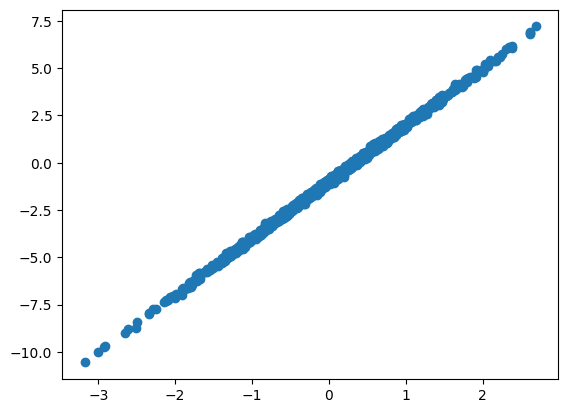

In [36]:
plt.scatter(xs, ys)

In [38]:
def model(theta, x):
    w, b = theta
    return w * x + b

In [41]:
def loss_fn(theta, x, y):
    prediction = model(theta, x)
    return jnp.mean((prediction - y)**2)

In [42]:
@jax.jit
def update(theta, x, y, lr=0.1):
    return theta - lr * jax.grad(loss_fn)(theta, x, y)

In [43]:
theta = jnp.array([1., 1.])

In [44]:
for _ in range(1000):
    theta = update(theta, xs, ys)

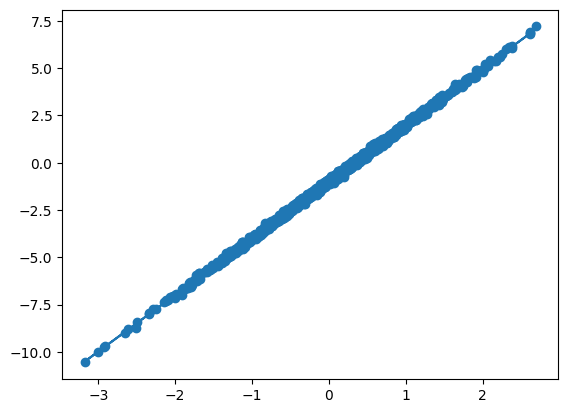

In [46]:
plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

In [47]:
w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")

w: 2.99, b: -1.00
